In [1]:
# Importation des packages de traitement des données

import pandas as pd
import numpy as np

# Importation des packages de visualisation

import seaborn as sns
%matplotlib inline
import datetime as dt 

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import json

In [2]:
# Importation du jeu de données de  valeurs de CO2

df=pd.read_csv('owid-co2-data.csv',parse_dates=[0])
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# On ne garde que les valeurs de CO2 (émissions globales en millions de tonnes), le pays et l'année

df = df[ ['country','co2', 'year']]
df.head()

,country,co2,year
0,Afghanistan,NaN,1850
1,Afghanistan,NaN,1851
2,Afghanistan,NaN,1852
3,Afghanistan,NaN,1853
4,Afghanistan,NaN,1854


In [4]:
# On vérifie qu'il n'y a pas de doublons

df.duplicated().sum()

0

In [5]:
# On vérifie le nombre de valeurs manquantes.

df.isna().sum()

country        0
co2        15174
year           0
dtype: int64

Il y a beaucoup de valeurs manquantes qui s'expliquent par le fait que dans beaucoup de pays, il n'y a pas eu de mesures précises du CO2 dans l'atmopshère. Celà est du au manque d'infrastructures efficaces pour la prise de relevé, surtout avant 1950.

In [6]:
# On ne garde que les données après 1880 car avant il y a beaucoup trop de valeurs manquantes

df.drop(df[(df['year'] <1880)].index, inplace=True)

In [7]:
# Affichage du nombre de lignes et de colonnes de notre Dataframe

df.shape

(35378, 3)

In [8]:
# Afficahge du nombre de valeurs différentes pour la colonne country

df.country.nunique()

269

<AxesSubplot: >

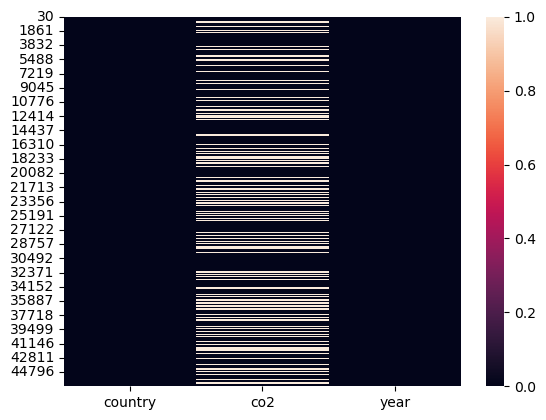

In [9]:
# Affichage d'une heatmap avec les valeurs manquantes

sns.heatmap(df.isna())

Nous décidons de ne pas remplacer les valeurs manquantes car l'absence de données ne signifie pas qu'il n'y a pas d'émissions de CO2

In [10]:
# 1ere selection avec les pays émettant plus de 1500 milllions de tonnes de CO2 par an

df_selection1 = df[df.co2 > 1500]

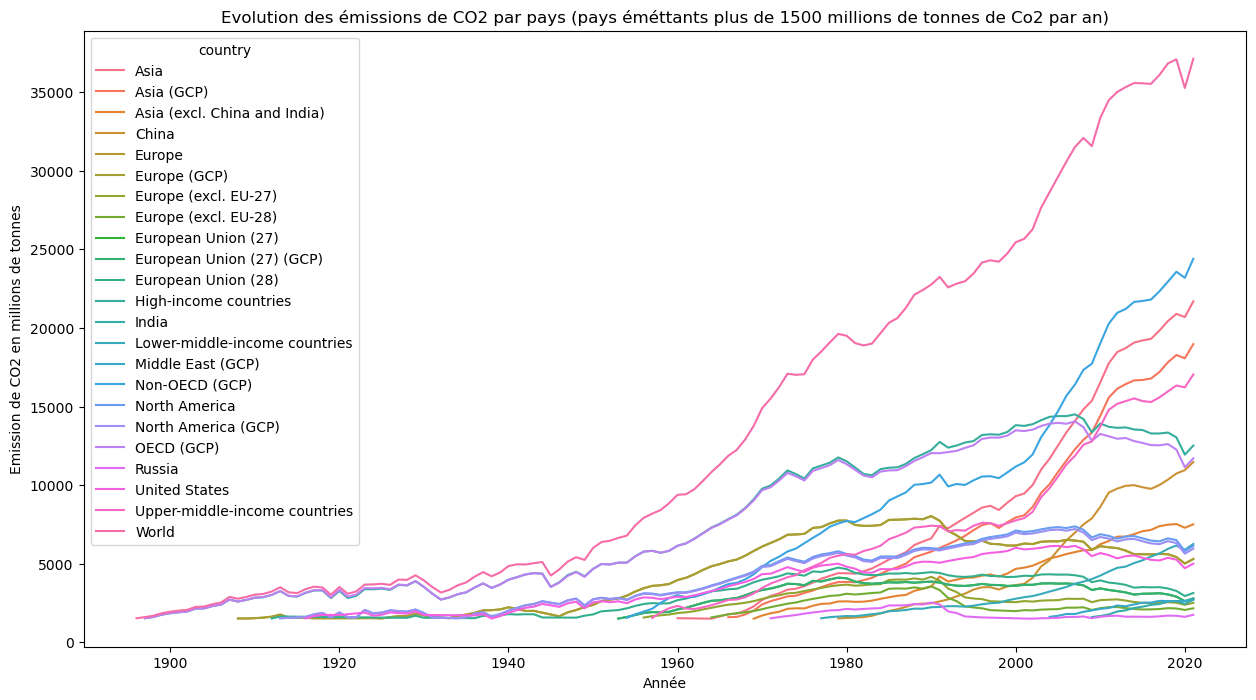

In [11]:
fig = plt.figure(figsize = (15, 8))
sns.lineplot(x='year', y='co2', hue='country', data=df_selection1);
plt.xlabel('Année');
plt.ylabel('Emission de CO2 en millions de tonnes');
plt.title("Evolution des émissions de CO2 par pays (pays éméttants plus de 1500 millions de tonnes de Co2 par an)");

Ce graphe montre que globalement les émissions de C02 n'ont cessé d'augmenter depuis la seconde guerre mondiale 

In [12]:
# Selection des pays ou groupe de pays les plus émetteurs de CO2

df_selection_biggest=df[df['country'].isin(['Africa', 'Asia (excl. China and India)', 'China', 'European Union (28)', 'India', 'Middle East (GCP)', 'Russia', 'South America', 'United States'])]


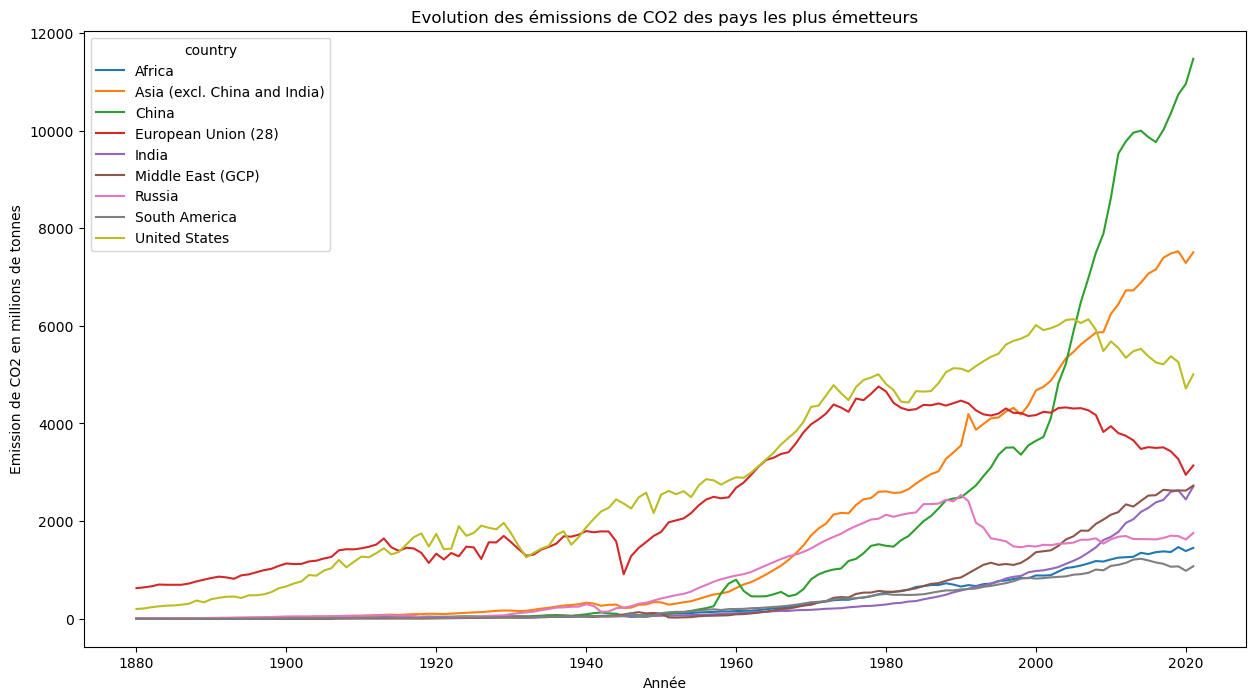

In [13]:
# Affichage de l'Evolution des émissions de CO2 des pays les plus émetteurs

fig = plt.figure(figsize = (15, 8))
sns.lineplot(x='year', y='co2', hue='country', data=df_selection_biggest);
plt.xlabel('Année');
plt.ylabel('Emission de CO2 en millions de tonnes');
plt.title("Evolution des émissions de CO2 des pays les plus émetteurs");

Ce graphique montre que l’évolution des émissions de CO2 dans les grands pays industrialisés et les grands pôles d’activités n’est pas la même. Dans les pays d’Europe et les Etats-Unis, les émissions de CO2 ont globalement reculées, contrairement à la Chine ou l’Asie.

Si on prend l’exemple de l’Union Européenne, on voit dans la courbe que les émissions de CO2 ont baissé en 1945, après la 2ème Guerre Mondiale, puis de nouveau suite aux choc pétroliers de 1973 et 1979. Depuis, la courbe nous montre que les émissions ont tendance à baisser,  et particulièrement pendant la période de la pandémie de COVID-19. 
Depuis 2020, l’ensemble des émissions à tendance à repartir à la hausse.


In [14]:
# Selection des pays suivants le taux de revenus

df_selection_income=df[df['country'].isin(['High-income countries','Low-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries'])]

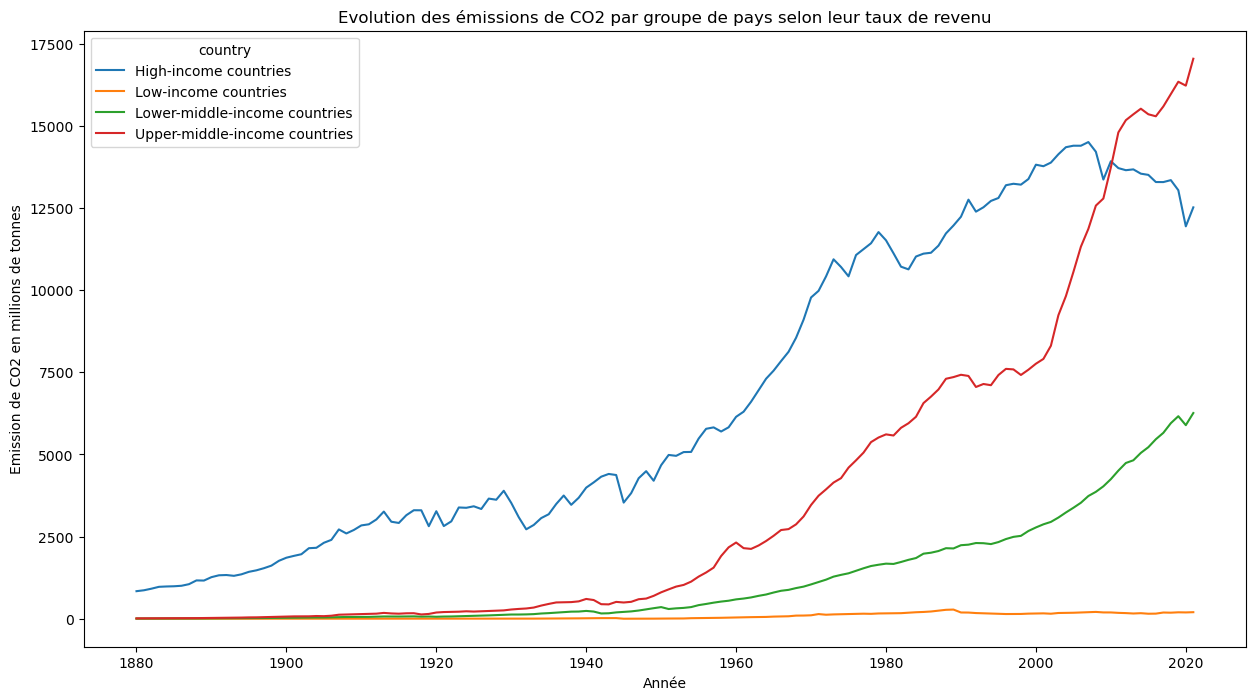

In [15]:
# Affichage de l'Evolution des émissions de CO2 par groupe de pays selon leur taux de revenu

fig = plt.figure(figsize = (15, 8))
sns.lineplot(x='year', y='co2', hue='country', data=df_selection_income);
plt.xlabel('Année');
plt.ylabel('Emission de CO2 en millions de tonnes');
plt.title("Evolution des émissions de CO2 par groupe de pays selon leur taux de revenu");

Ce graphique montre l’évolution des émissions en fonction du revenu moyen de chaque pays.
4 groupes ont été créés afin de différencier les pays avec un taux de revenu élevé et ceux avec un taux de revenu faible.
Nous constatons que les 4 courbes ont une tendance haussière mais qu’elles sont différentes..
Pour les pays avec un taux de revenu élevé (High-income countries), les émissions sont plus importantes, mais depuis 2008 et le choc économique les émissions ont baissé.
Pour les pays avec un plus faible taux de revenu (Upper-middle-income et lower-middle-income countries), les émissions étaient très faibles avant 1945 mais elles ont très fortement augmenté depuis, sans pour autant atteindre celle de l’autre groupe de pays.
On constate la même inflexion sur les 4 courbes lors de la crise du COVID-19.


In [16]:
# Selection des pays faisants partis ou non de l'OCDE

df_selection_ocde=df[df['country'].isin(['Non-OECD (GCP)','OECD (GCP)'])]

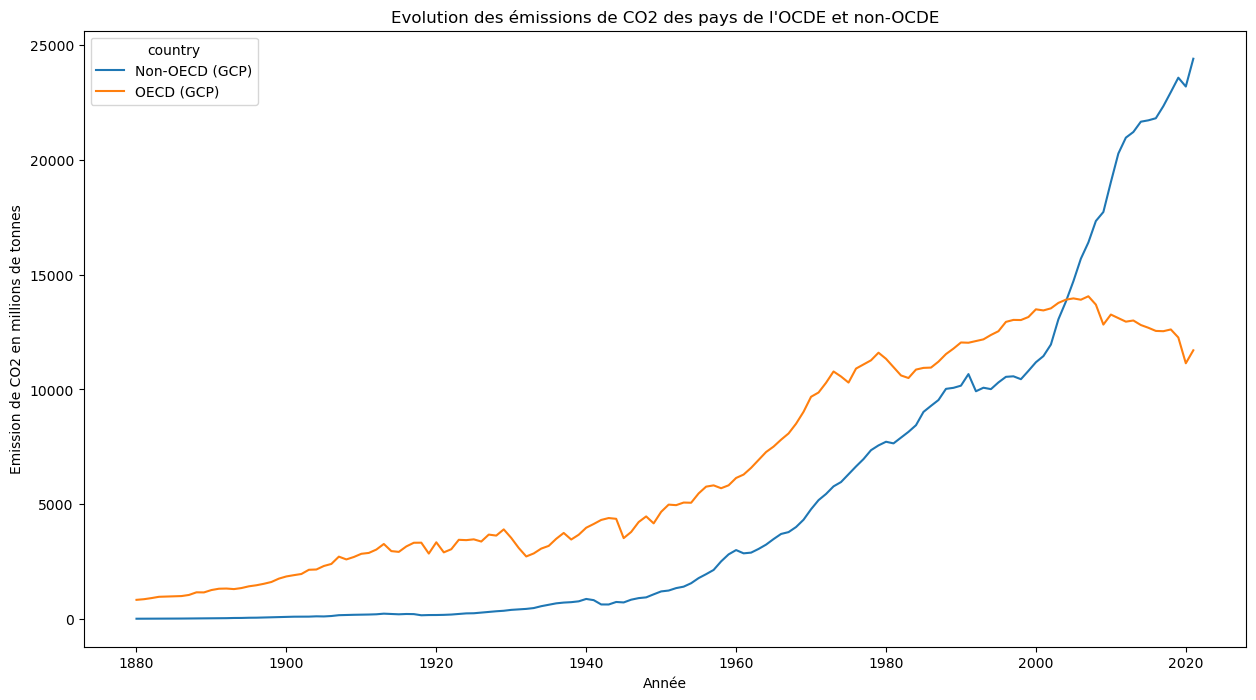

In [17]:
# Affichage de l'Evolution des émissions de CO2 des pays de l'OCDE et non-OCDE

fig = plt.figure(figsize = (15, 8))
sns.lineplot(x='year', y='co2', hue='country', data=df_selection_ocde);
plt.xlabel('Année');
plt.ylabel('Emission de CO2 en millions de tonnes');
plt.title("Evolution des émissions de CO2 des pays de l'OCDE et non-OCDE");

L’évolution des émissions des membres de l’OCDE est très similaire à celle des pays ayant le plus de revenus, vu dans le graphe précédent.
Elle suit une tendance haussière jusqu’en 2008 puis à tendance à baisser.
Alors que la courbe des pays non-membres suit une tendance haussière exponentielle, portée principalement par les émissions de la Chine.
On constate que les 2 courbes se croisent au début des années 2000 et ce sont désormais les pays non-membres de l’OCDE qui sont les plus émetteurs de CO2.	 

In [18]:
# remplacement de noms de pays en corrélation avec les nom s dans notre fichier geaojson

df = df.replace(to_replace=['United States', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Tanzania'], value=['United States of America', 'Ivory Coast', 'Democratic Republic of the Congo', 'United Republic of Tanzania'])

In [19]:
# Sélection des pays pour l'affichage

df_selection_for_map = df[df['country'].isin(['Afghanistan','Aland Islands',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica','Ivory Coast', 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Equatorial Africa (GCP)', 'French West Africa (GCP)', 'French Guiana',
       'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia',
       'Lebanon', 'Leeward Islands (GCP)', 'Lesotho', 'Liberia', 'Libya',
       'Liechtenstein', 'Lithuania', 
       'Luxembourg', 'Macao',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius',
       'Mayotte', 'Mexico', 'Micronesia (country)', 
       'Moldova', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
       'Netherlands', 'Netherlands Antilles', 'New Caledonia',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue',
       'North Korea', 'North Macedonia',
       'Norway', 'Oceania', 'Oman',
       'Pakistan', 'Palau', 'Palestine', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Reunion', 'Romania', 'Russia', 'Rwanda', 'Ryukyu Islands (GCP)',
       'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Martin (French part)', 'Saint Pierre and Miquelon',
       'Saint Vincent and the Grenadines', 'Samoa',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain',
       'Sri Lanka', 'St. Kitts-Nevis-Anguilla (GCP)', 'Sudan', 'Suriname',
       'Svalbard and Jan Mayen', 'Sweden', 'Switzerland', 'Syria',
       'Taiwan', 'Tajikistan', 'United Republic of Tanzania', 'Thailand', 'Timor', 'Togo',
       'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States of America', 'United States Virgin Islands',
       'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'])]

In [20]:
# Importation du fichier geojson

with open('world.geo.json') as response:
 world = json.load(response) # Javascrip object notation 

In [21]:
state_id_map = {}
for feature in world ['features']:
 feature['id'] = feature['properties']['admin']
 state_id_map[feature['properties']['adm0_a3']] = feature['id']

In [22]:
# Création d'un graphe interactif avec les émissions de C02 par pays en fonction de l'année

fig = px.choropleth(
 df_selection_for_map, #database
 locations = 'country', #define the limits on the map/geography
 geojson = world, #shape information
 color = "co2", #defining the color of the scale through the database
 color_continuous_scale=px.colors.sequential.Rainbow,
 hover_name = "country", #the information in the box
 hover_data =["country"],
 title = "Emissions de CO2 par pays (en millions de tonnes)", #title of the map
 animation_frame = "year" #creating the application based on the year
)
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
            )
)
pyo.plot(fig, filename="Emissions de CO2 par pays.html")

'Emissions de CO2 par pays.html'

In [24]:
# Création d'un graphe interactif avec selecteur de pays

import dash
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash

# Create a Dash app
app = JupyterDash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id="country-selector",
        options=[{"label": country, "value": country} for country in df["country"].unique()],
        value=["Afghanistan"],
        multi=True
    ),
    dcc.Graph(id="line-plot")
])


# Define the callback function that updates the plot when the dropdown selection changes
@app.callback(
    dash.dependencies.Output("line-plot", "figure"),
    [dash.dependencies.Input("country-selector", "value")]
)
def update_plot(selected_countries):
    # Filter the DataFrame to only include the selected countries
    filtered_df = df[df["country"].isin(selected_countries)]
    
    # Create the line plot using Plotly
    fig = px.line(filtered_df, x="year", y="co2", color="country", title="Emissions de CO2 par pays - Sélecteur")
    
    # Set the width and height of the plot
    fig.update_layout(width=1000, height=600)
    
    # Return the plot
    return fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True, port=8057)


Dash app running on http://127.0.0.1:8057/


In [ ]:
df.to_csv('co2_par_pays.csv', index=False)

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/Users/jbcassin/opt/anaconda3/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/Users/jbcassin/opt/anaconda3/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jbcassin/opt/anaconda3/lib/python3.9/site-packages/retrying.py", line 56, in wrapped_f
    return Retrying(*dargs, **dkw).call(f, *args, **kw)
  File "/Users/jbcassin/opt/anaconda3/lib/python3.9/site-packages/retrying.py", line 266, in call
    raise attempt.get()
  File "/Users/jbcassin/opt/anaconda3/lib/python3.9/site-packages/retrying.py", line 301, in get
    six.reraise(self.value[0], self.value[1], self.value[2])
  File "/Users/jbcassin/opt/anaconda3/lib/python3.9/site-packages/six.py", line 719, in reraise
    raise value
  File "/Users/jbcassin/opt/anaconda3/lib/python3.9/site-packages/retrying.py", line 251, in call
    attempt = Attempt(fn(*args, **kwargs), at